<a href="https://colab.research.google.com/github/Rajib2805/test/blob/main/Covid_India_Webscraping%2BMapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Webscraping a table to get Covid data

In [ ]:
import requests
from bs4 import BeautifulSoup
import lxml.html as lh #this library provides utilities for html processing tasks
import pandas as pd

In [ ]:
url="https://covidindia.org/"
page= requests.get(url)
page

<Response [200]>

In [ ]:
page.content[0:500]

b'<!DOCTYPE html>\n<html lang="en-US">\n<head><style>img.lazy{min-height:1px}</style><link rel="preload" href="https://covidindia.org/wp-content/plugins/w3-total-cache/pub/js/lazyload.min.js" as="script">\n\t<meta charset="UTF-8">\n\t<link rel="profile" href="https://gmpg.org/xfn/11">\n\t\n\t<!-- This site is optimized with the Yoast SEO plugin v14.7 - https://yoast.com/wordpress/plugins/seo/ -->\n\t<title>COVID-19 Tracker Updates For India For State Wise &amp; District Wise Data</title>\n\t<meta name="descript'

In [ ]:
#Store the contents of the website under doc
doc = lh.fromstring(page.content)
doc

<Element html at 0x7f2c1e7b1f48>

In [ ]:
soup= BeautifulSoup(page.content, 'html.parser')

In [ ]:
#fetching the table whose data is to be extracted
stat_table= soup.find_all('table', id= 'tablepress-96')

In [ ]:
len(stat_table)

1

In [ ]:
len(stat_table[0].find_all('tr')) #even though there is only table, we need to specift as table[0] or else error will come

39

In [ ]:
with open('coronafile.txt', 'w') as r: 
 for row in stat_table[0].find_all('tr', style='')[1:50]: # we know there are 28 states ans 8 union territories. Just specifying 50 arbitrarily to have the maximum value to get included in the list
    for cell in row.find_all('td')[0:4]:
       r.write(cell.text)
       r.write('\t')
    r.write('\n')    

In [ ]:
df = pd.read_table("/content/coronafile.txt", sep='\t', header=None)
df.head()

,0,1,2,3,4
0,Andaman and Nicobar Islands,3884,3649,53,NaN
1,Andhra Pradesh,723512,666433,6019,NaN
2,Arunachal Pradesh,10548,7577,18,NaN
3,Assam,186200,152124,749,NaN
4,Bihar,188858,176674,924,NaN


In [ ]:
df.columns

Int64Index([0, 1, 2, 3, 4], dtype='int64')

In [ ]:
df.rename(columns={0:'State/UT', 1:'ConfirmedCases', 2:'Recovered', 3:'Deaths'}, inplace=True) #inplace=True means the data is modified inplace
df[0:2]

,State/UT,ConfirmedCases,Recovered,Deaths,4
0,Andaman and Nicobar Islands,3884,3649,53,NaN
1,Andhra Pradesh,723512,666433,6019,NaN


In [ ]:
df.dtypes

State/UT           object
ConfirmedCases      int64
Recovered           int64
Deaths              int64
4                 float64
dtype: object

In [ ]:
#leaving aside the last column and the last row which has garbage data and thus cleaning the dataframe
Covid_final= df[['State/UT', 'ConfirmedCases', 'Recovered', 'Deaths']][0:36]
Covid_final

,State/UT,ConfirmedCases,Recovered,Deaths
0,Andaman and Nicobar Islands,3884,3649,53
1,Andhra Pradesh,723512,666433,6019
2,Arunachal Pradesh,10548,7577,18
3,Assam,186200,152124,749
4,Bihar,188858,176674,924
5,Chandigarh,12445,10598,174
6,Chhattisgarh,123324,93731,1044
7,Dadar & Nagar Haveli; Daman & Diu,3087,2980,2
8,Delhi,290613,260350,5510
9,Goa,35328,30033,456


In [ ]:
!pip install geopandas
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import linestring

In [ ]:
shapefile= "/content/drive/My Drive/Indian_States.shp"
map_df = gpd.read_file(shapefile)
map_df

,st_nm,geometry
0,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."
5,Chhattisgarh,"POLYGON ((83.33532 24.09885, 83.35346 24.09627..."
6,Dadara & Nagar Havelli,"POLYGON ((73.20657 20.12216, 73.20797 20.10650..."
7,Daman & Diu,"MULTIPOLYGON (((72.89335 20.44539, 72.89281 20..."
8,Goa,"MULTIPOLYGON (((74.11918 14.75344, 74.11350 14..."
9,Gujarat,"MULTIPOLYGON (((71.70375 20.99958, 71.70375 20..."


In [ ]:
#replacing the State names in st_nm to match with the State/UT names
Covid_final= Covid_final.replace('Andaman and Nicobar Islands', 'Andaman & Nicobar Island')
Covid_final= Covid_final.replace('Arunachal Pradesh', 'Arunanchal Pradesh')
Covid_final= Covid_final.replace('Dadar & Nagar Haveli; Daman & Diu', 'Daman & Diu')
Covid_final= Covid_final.replace('Delhi', 'NCT of Delhi')
Covid_final= Covid_final.replace('Jammu and Kashmir', 'Jammu & Kashmir')

In [ ]:
#For attribute join. Note that left on and right on are the name of the common data field in the 
#left and right dataframe respectively
#table-1
india_shapes = map_df[['geometry', 'st_nm']]

#table-2
Covid_final

#Merging table-1 and table-2
india_shapes = india_shapes.merge(Covid_final, left_on='st_nm',right_on='State/UT')
india_shapes.tail()

,geometry,st_nm,State/UT,ConfirmedCases,Recovered,Deaths
30,"MULTIPOLYGON (((80.44802 24.99631, 80.44080 24...",Uttar Pradesh,Uttar Pradesh,414466,362052,6029
31,"POLYGON ((79.21047 31.34846, 79.21386 31.34680...",Uttarakhand,Uttarakhand,51991,42368,669
32,"MULTIPOLYGON (((88.01861 21.57278, 88.01889 21...",West Bengal,West Bengal,273679,240707,5255
33,"MULTIPOLYGON (((86.38937 19.96351, 86.38840 19...",Odisha,Odisha,232713,202302,960
34,"MULTIPOLYGON (((81.10380 17.82269, 81.10610 17...",Andhra Pradesh,Andhra Pradesh,723512,666433,6019


Here we see that due to difference in the names in both the fields, some names of states have been left out. To find out which are left out

In [ ]:
#to find the left out cases arising due to common field difference in item name. The names are found with NaN values at the end
india_shapes_left_out = india_shapes.merge(Covid_final, left_on='st_nm',right_on='State/UT', how='right')
india_shapes_left_out[28:]

,geometry,st_nm,State/UT_x,ConfirmedCases_x,Recovered_x,Deaths_x,State/UT_y,ConfirmedCases_y,Recovered_y,Deaths_y
28,"POLYGON ((73.89849 29.97896, 73.90021 29.97140...",Rajasthan,Rajasthan,144030.0,121331.0,1545.0,Rajasthan,144030,121331,1545
29,"POLYGON ((88.65381 28.09883, 88.66265 28.08956...",Sikkim,Sikkim,3093.0,2480.0,45.0,Sikkim,3093,2480,45
30,"MULTIPOLYGON (((78.19188 8.72730, 78.18996 8.7...",Tamil Nadu,Tamil Nadu,619996.0,564092.0,9784.0,Tamil Nadu,619996,564092,9784
31,"POLYGON ((81.05614 17.79097, 81.05834 17.75464...",Telangana,Telangana,200611.0,172388.0,1171.0,Telangana,200611,172388,1171
32,"POLYGON ((92.22108 24.50131, 92.22771 24.49862...",Tripura,Tripura,27030.0,21853.0,296.0,Tripura,27030,21853,296
33,"MULTIPOLYGON (((80.44802 24.99631, 80.44080 24...",Uttar Pradesh,Uttar Pradesh,414466.0,362052.0,6029.0,Uttar Pradesh,414466,362052,6029
34,"POLYGON ((79.21047 31.34846, 79.21386 31.34680...",Uttarakhand,Uttarakhand,51991.0,42368.0,669.0,Uttarakhand,51991,42368,669
35,"MULTIPOLYGON (((88.01861 21.57278, 88.01889 21...",West Bengal,West Bengal,273679.0,240707.0,5255.0,West Bengal,273679,240707,5255


In [ ]:
india_shapes_left_out[28:]

,geometry,st_nm,State/UT_x,ConfirmedCases_x,Recovered_x,Deaths_x,State/UT_y,ConfirmedCases_y,Recovered_y,Deaths_y
28,"POLYGON ((73.89849 29.97896, 73.90021 29.97140...",Rajasthan,Rajasthan,144030.0,121331.0,1545.0,Rajasthan,144030,121331,1545
29,"POLYGON ((88.65381 28.09883, 88.66265 28.08956...",Sikkim,Sikkim,3093.0,2480.0,45.0,Sikkim,3093,2480,45
30,"MULTIPOLYGON (((78.19188 8.72730, 78.18996 8.7...",Tamil Nadu,Tamil Nadu,619996.0,564092.0,9784.0,Tamil Nadu,619996,564092,9784
31,"POLYGON ((81.05614 17.79097, 81.05834 17.75464...",Telangana,Telangana,200611.0,172388.0,1171.0,Telangana,200611,172388,1171
32,"POLYGON ((92.22108 24.50131, 92.22771 24.49862...",Tripura,Tripura,27030.0,21853.0,296.0,Tripura,27030,21853,296
33,"MULTIPOLYGON (((80.44802 24.99631, 80.44080 24...",Uttar Pradesh,Uttar Pradesh,414466.0,362052.0,6029.0,Uttar Pradesh,414466,362052,6029
34,"POLYGON ((79.21047 31.34846, 79.21386 31.34680...",Uttarakhand,Uttarakhand,51991.0,42368.0,669.0,Uttarakhand,51991,42368,669
35,"MULTIPOLYGON (((88.01861 21.57278, 88.01889 21...",West Bengal,West Bengal,273679.0,240707.0,5255.0,West Bengal,273679,240707,5255


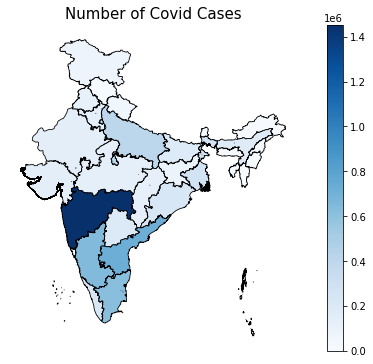

In [ ]:
#making a choroplethe map for the total number of infected cases
fig1, ax = plt.subplots(1, figsize=(10, 6))
ax.axis('off')
ax.set_title('Number of Covid Cases', fontdict={'fontsize': '15', 'fontweight' : '8'})

india_shapes.plot(column='ConfirmedCases', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='Black', legend=True)

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud

In [ ]:
newfile= india_shapes[['st_nm', 'ConfirmedCases', 'Recovered', 'Deaths']]
newfile.head()

,st_nm,ConfirmedCases,Recovered,Deaths
0,Andaman & Nicobar Island,3884,3649,53
1,Arunanchal Pradesh,10548,7577,18
2,Assam,186200,152124,749
3,Bihar,188858,176674,924
4,Chandigarh,12445,10598,174


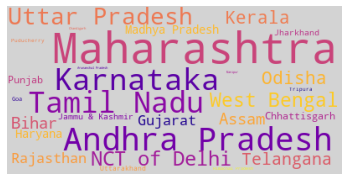

In [ ]:
#Draw a wordcloud of the most affected states
d = {w: f for w, f in
     zip(newfile['st_nm'], newfile['ConfirmedCases'])}
wordcloud = WordCloud(background_color='lightgrey', colormap='plasma', prefer_horizontal=1)
wordcloud.generate_from_frequencies(frequencies=d)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
#adding recovery ratio and death ratio as two new features
newfile= (newfile.assign(ActiveCoronaCases= newfile['ConfirmedCases']- newfile['Recovered']-newfile['Deaths']))
newfile= (newfile.assign(recovery_ratio= newfile['Recovered'] / newfile['ConfirmedCases']*100))
newfile= (newfile.assign(death_ratio= newfile['Deaths'] / newfile['ConfirmedCases']*100))
newfile.head()

,st_nm,ConfirmedCases,Recovered,Deaths,ActiveCoronaCases,recovery_ratio,death_ratio
0,Andaman & Nicobar Island,3884,3649,53,182,93.949537,1.364573
1,Arunanchal Pradesh,10548,7577,18,2953,71.833523,0.170648
2,Assam,186200,152124,749,33327,81.699248,0.402256
3,Bihar,188858,176674,924,11260,93.548592,0.489256
4,Chandigarh,12445,10598,174,1673,85.158698,1.398152


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  This is separate from the ipykernel package so we can avoid doing imports until


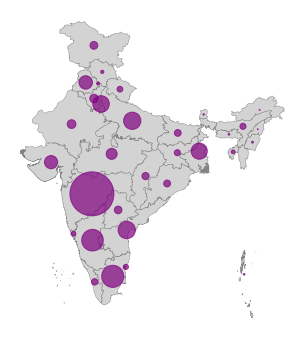

In [ ]:
#making a bubble plot for the total number of death cases
gdf_points = india_shapes.copy()
gdf_points['geometry'] = gdf_points['geometry'].centroid

fig1, ax = plt.subplots(1, figsize=(10, 6))
india_shapes.plot(ax=ax, color='lightgray', edgecolor='grey', linewidth=0.4)
gdf_points.plot(ax=ax, color='purple', markersize= india_shapes['Deaths']*0.05, alpha=0.7, categorical=False, legend=True) # note that *.05 is done to reduce the size of the bubbles as per requirement
ax.axis('off') #the box around the map is not required
plt.show()

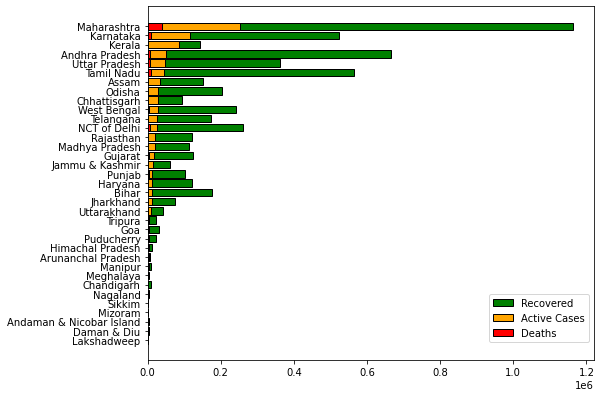

In [ ]:
#to arrange in ascending order and to show legends

df_sorted_desc= newfile.sort_values('ActiveCoronaCases',ascending=True)
plt.figure(figsize=(8,6.5))

p1= plt.barh('st_nm', 'Recovered', color='green', edgecolor='black', data=df_sorted_desc)
p2= plt.barh('st_nm', 'ActiveCoronaCases', color='orange', edgecolor='black', data=df_sorted_desc)
p3= plt.barh('st_nm', 'Deaths', color='red', edgecolor='black', data=df_sorted_desc)

plt.legend(('Recovered', 'Active Cases', 'Deaths'), bbox_to_anchor=(1.0, 0.2)) # bbx to anchor is for placement of the legend in the box
plt.show()

Text(0.5, 1.0, 'Total corona infection in India-Statewise')

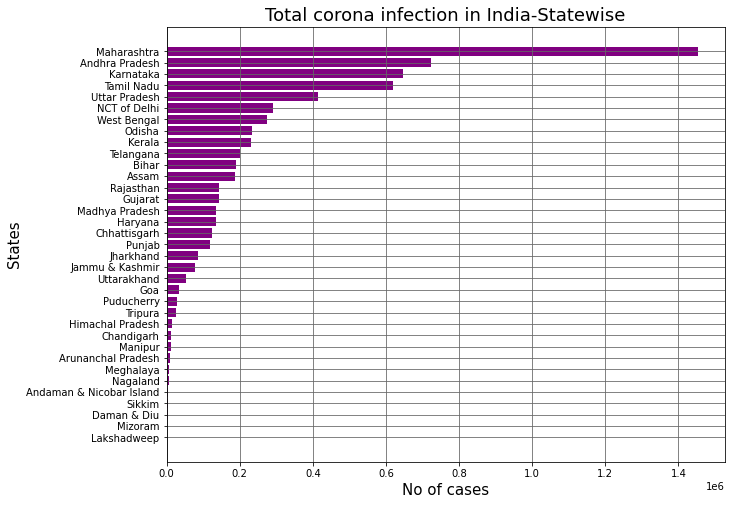

In [ ]:
df_sorted_desc= newfile.sort_values('ConfirmedCases',ascending=True)
plt.figure(figsize=(10,8))
plt.barh('st_nm', 'ConfirmedCases',data=df_sorted_desc, color='purple')
plt.xlabel("No of cases", size=15)
plt.ylabel("States", size=15)
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.title("Total corona infection in India-Statewise", size=18)


Text(0.5, 1.0, 'Active Corona Cases at present-Statewise')

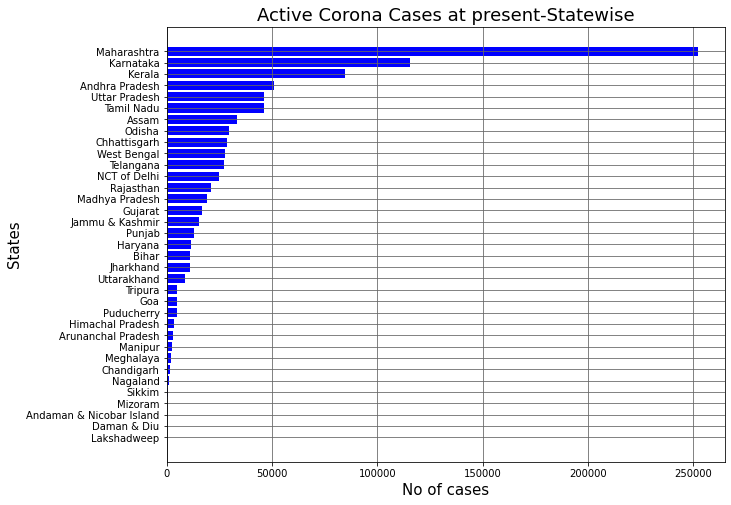

In [ ]:
#to find the states with active corona cases at present 
df_sorted_desc= newfile.sort_values('ActiveCoronaCases',ascending=True)
plt.figure(figsize=(10,8))
plt.barh('st_nm', 'ActiveCoronaCases',data=df_sorted_desc, color='blue')
plt.xlabel("No of cases", size=15)
plt.ylabel("States", size=15)
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.title("Active Corona Cases at present-Statewise", size=18)

5620035 103653 925007
The total number of corona infection cases in India is:  6648695


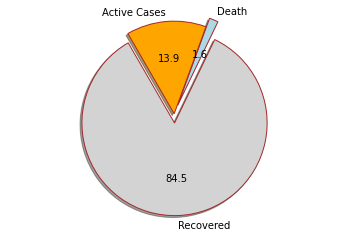

In [ ]:
#drawing a piechart for the total corona statistics in India overall
piefile1= newfile.Recovered.sum()
piefile2= newfile.Deaths.sum()
piefile3= newfile.ActiveCoronaCases.sum()
total_corona_cases= piefile1+piefile2+piefile3
print(piefile1, piefile2, piefile3)
print("The total number of corona infection cases in India is: ", total_corona_cases)

pieLabels= 'Recovered', 'Death', 'Active Cases'
populationShare= [piefile1, piefile2, piefile3]
figureObject, axesObject = plt.subplots()

explodeTuple = (0.1, 0.1, 0.0)
colors=('lightgrey', 'lightblue', 'orange')
axesObject.pie(populationShare, labels=pieLabels, autopct='%1.1f', 
               explode= explodeTuple, colors=colors, shadow=True, 
               startangle=120, 
               wedgeprops= {'linewidth' : 1,'edgecolor' : "brown" })
axesObject.axis('equal')
plt.show()

In [ ]:
#to create a dataframe manually
data= [total_corona_cases, piefile1, piefile3, piefile2]
type= ['TotalCorona_cases', 'Recovered_cases', 'Active_cases', 'Death_cases']
df= pd.DataFrame(list(zip(type, data)), columns =['type', 'data']) 
df


,type,data
0,TotalCorona_cases,6648695
1,Recovered_cases,5620035
2,Active_cases,925007
3,Death_cases,103653


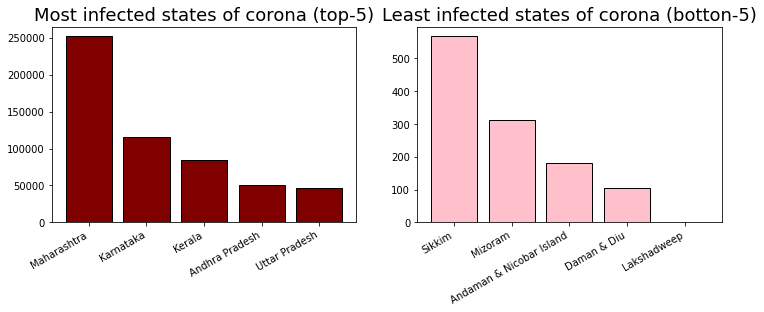

In [ ]:
#to find the top 5 and the bottom 5 infescted state
from matplotlib.gridspec import GridSpec
import numpy as np
newfile1= newfile.sort_values(by='ActiveCoronaCases', ascending= False)
newfile2=newfile1[:5]
newfile3=newfile1[-5:]

fig = plt.figure(figsize=(12, 4))
gs = GridSpec(nrows=1, ncols=2)
ax0 = fig.add_subplot(gs[0, 0])
ax0.bar(newfile2['st_nm'], newfile2['ActiveCoronaCases'], edgecolor='black', color='maroon')
plt.title("Most infected states of corona (top-5)", size=18)
fig.autofmt_xdate()

ax1 = fig.add_subplot(gs[0, 1])
ax1.bar(newfile3['st_nm'], newfile3['ActiveCoronaCases'], edgecolor='black', color='pink')
plt.title("Least infected states of corona (botton-5)", size=18)
fig.autofmt_xdate() #the 
plt.show()

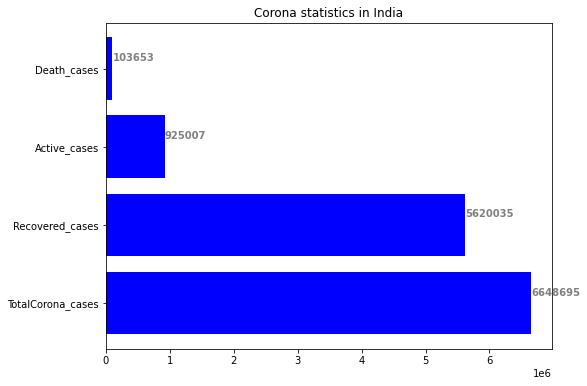

In [ ]:
type = df['type'].head(12) 
data = df['data'].head(12)  
fig, ax = plt.subplots(figsize =(8, 6)) 
ax.barh(type, data, color='blue') 
  
# Add annotation to bars 
for i in ax.patches: 
    plt.text(i.get_width()+0.2, i.get_y()+0.5,  
             str(round((i.get_width()), 2)), 
             fontsize = 10, fontweight ='bold', 
             color ='grey') 
  
ax.set_title('Corona statistics in India') 
plt.show() 

Text(0.5, 1.0, 'Recovery rate from Corona by States in India')

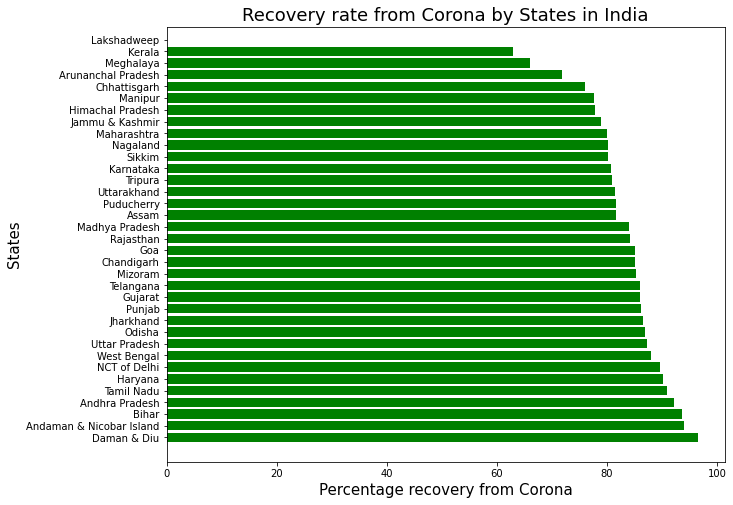

In [ ]:
#to find the statwise recovery percentage
df_sorted_desc= newfile.sort_values('recovery_ratio',ascending=False)
plt.figure(figsize=(10,8))
plt.barh('st_nm', 'recovery_ratio',data=df_sorted_desc, color='green')
plt.xlabel("Percentage recovery from Corona", size=15)
plt.ylabel("States", size=15)
plt.title("Recovery rate from Corona by States in India", size=18)

Text(0.5, 1.0, 'Death rate from Corona by States in India')

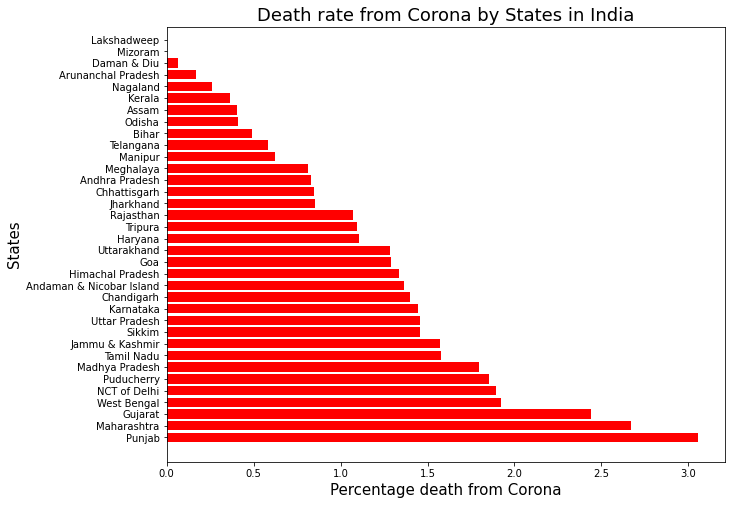

In [ ]:
#to find the statwise death percentage
df_sorted_desc= newfile.sort_values('death_ratio',ascending=False)
plt.figure(figsize=(10,8))
plt.barh('st_nm', 'death_ratio',data=df_sorted_desc, color='red')
plt.xlabel("Percentage death from Corona", size=15)
plt.ylabel("States", size=15)
plt.title("Death rate from Corona by States in India", size=18)

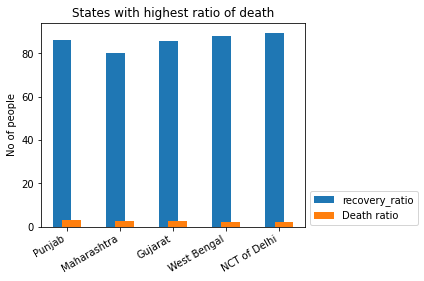

In [ ]:
#arranging in the order of death ratio
myfile= newfile.sort_values(by='death_ratio', ascending= False)[0:5]

labels= myfile['st_nm']
bar1 = myfile['recovery_ratio']
bar2 = myfile['death_ratio']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/4, bar1, width, label='recovery_ratio')
rects2 = ax.bar(x + width/4, bar2, width, label='Death ratio')

ax.set_ylabel('No of people')
ax.set_title('States with highest ratio of death')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor=(1.0, 0.2))
fig.tight_layout()
fig.autofmt_xdate()
plt.show()

3469229 3179466


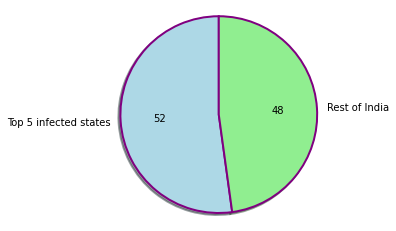

In [ ]:
#plotting the top 5 states vs the rest of India
newfile4=newfile1[:5]
newfile5=newfile1[5:]

newfile4= newfile4.ConfirmedCases.sum()
newfile5= newfile5.ConfirmedCases.sum()
print(newfile4, newfile5)

pieLabels= 'Top 5 infected states', 'Rest of India'
populationShare= [newfile4, newfile5]
figureObject, axesObject = plt.subplots()

colors=('lightblue', 'lightgreen')
axesObject.pie(populationShare, labels=pieLabels, autopct='%1.0f', 
               colors=colors, shadow=True, startangle=90, 
               wedgeprops= {'linewidth' : 2,'edgecolor' : "purple" })
axesObject.axis('equal')
plt.show()

**Analysis Report: **
I have used python language due to better familiarity with this language of late. I have used this opportunity to understand and practive Python language which I have just started to learn in this course.

The analysis is related to Corona infection in the different states in India. Data has been extracted through webscraping directly from the website www.covidindia.org with the use of libraries such as Beautiful Soup and requests. Linking directly with the website will always help in getting a look at the up-to-date data whevever the program is refreshed. The analysis for the purpose of the assignment has been done on 13th September'20. The figures may change in future by refreshing the same report as live data comes in future.

**Conclusions drawn from analysis of the Corona virus data:**

1) The total number of corona cases in India as on date is 4836669. States with maximum number of active Corona infection cases are Maharastra, Karnataka, Andhra Pradesh, Uttar Pradesh and Tamil Nadu. Incidentally, these are also the states with the maximum number of corona infection cases.

2) Out of every 100 people infected on an avarage in India till date, 77.9% hace recovered, 1.7% have died and 20.4 % continue to remain infected.

3) The states/UTs with the least infection are Mizoram, Sikkim, Daman and Diu, Andaman & Nicobar Islands and Lakshadeep. This is understandable due to the small size (and therefore small population) of these states.

4) The states/UTs with the highest percentage of recovery among infected cases are Andaman and Nicobar Islands followed by Bihar, Daman and Diu, Tamil Nadu and West Bengal.

5) Death percentage is maximum in Punjab followed by Gujarat, Maharastra, Delhi and Madhya Pradesh.

6) The top 5 corona infected states account for 60% of the total corona cases in India. The balance states and UTs contribute 40%.
